> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Medical appointment no show!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this data set we will get to know that 30% of patients miss thier medical appoinments, and we will get to know why and discuss thier reasons.
This dataset includes the data of 100,000 patient from diffrernt places and areas in Brazil.
>Note that the the column that have 0 value means False, and the 1 value means True.
>The value F refers to female and the value M refers to male.
### > QUSETIONS to be asked for analysis:
>.Is there a correlation between the dataset ?
>.How many people show in the appointment and how many people don't ?
>.What the precentage between males and females ?
>.Does the gender affect on showing in appointment ?
>Does chronic diseases affect the showing rate ?
>Does the age affect the showing rate ?
>Does the neighbourhood affect the showing rate ?



In [9]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import import_ipynb
import pandas as pd 
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
#import plotly
#import plotly.express as px
%matplotlib inline


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> Here we are going to clean, and manipulate data to our will.

### General Properties
> we will try to answer the questions we asked above at the intro section, to get and know what we need from the dataset.

In [10]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()
#   types and look for instances of missing or possibly errant data.
#df.dtypes

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [11]:
df.shape

(110527, 14)

In [12]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [13]:
#we change the dtype of some columns to work with
df['PatientId'] = df['PatientId'].astype('int64')

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

df['No-show'] = df['No-show'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  bool          
dtypes: bool(1), datetime64[ns](2), int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Removing duplicates and useless data.)

In [14]:
# After discussing the structure of the data and any problems that need to be
df.duplicated().sum()
#So there are no duplicates


0

In [15]:
#we need to findout unique appointments
df['PatientId'].nunique()

62299

***checking for duplicates in 'PatientID' & 'No-show' columns


In [16]:
df['PatientId'].duplicated().sum()

48228

In [17]:
df['No-show'].duplicated().sum()

110526

In [18]:

#df.duplicated(['PatientId','No-show']).sum()

48228

In [19]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
#looks like we found min age is -1 so we need to change it.
minusss = df.query('Age==-1')
minusss


In [16]:
#removing -1 value from age column
df.drop(index=99832,inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [30]:
#changing column names
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.rename(columns={'No-show':'No_show'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
#removing duplicated ID with NO_show 
df.drop_duplicates(['PatientId', 'No_show'], inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,6.229800e+04,6.229800e+04,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000
mean,1.471660e+14,5.664946e+06,36.705496,0.092908,0.196507,0.070885,0.024174,0.020113,0.327362
std,2.549080e+14,7.396074e+04,23.531076,0.290306,0.397360,0.256635,0.153591,0.155058,0.469254
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176935e+12,5.629610e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.198294e+13,5.671714e+06,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.484763e+13,5.715459e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [19]:
df.shape

(62298, 14)

In [20]:
#removing some data _we arenot going to work with_ to start with questions process.
df.drop(columns=(['PatientId','AppointmentID','ScheduledDay','AppointmentDay']), axis=1, inplace=True)

In [21]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [24]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,True
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,True
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,True
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,True


<a id='eda'></a>
## Exploratory Data Analysis

>Now we have trimmed, cleaned and manipluated data to our will, but there is something missing, that is the way we are going to use our data now, So I will answer some of my analysis questions.
>We will use plots to answer questions.
### Research Question 1 (How many people show and how many people don't !?)

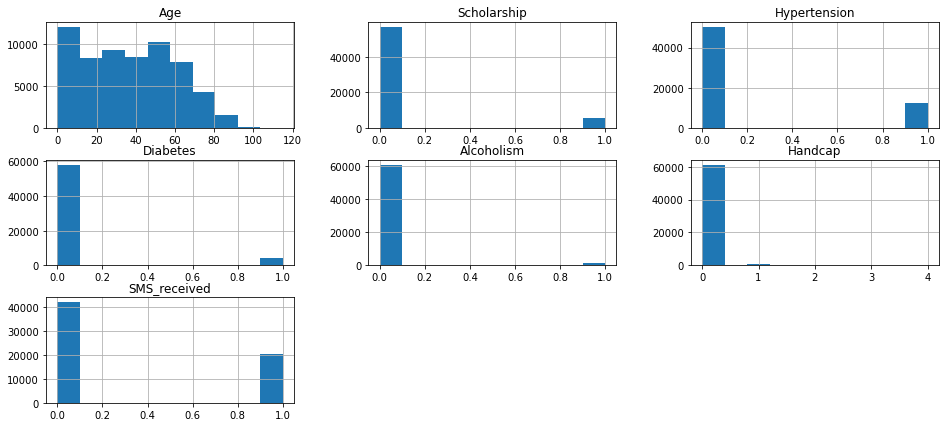

In [25]:
#we are going to take a quick generalized look at our data
df.hist(figsize=(16,7));

In [31]:
#declaring show and noshow
show = df.No_show=='Yes'
noshow = df.No_show=='No'
# omparing between show and no show 
df[show].count(),df[noshow].count()



(PatientId         22319
 AppointmentID     22319
 Gender            22319
 ScheduledDay      22319
 AppointmentDay    22319
 Age               22319
 Neighbourhood     22319
 Scholarship       22319
 Hypertension      22319
 Diabetes          22319
 Alcoholism        22319
 Handcap           22319
 SMS_received      22319
 No_show           22319
 dtype: int64,
 PatientId         88208
 AppointmentID     88208
 Gender            88208
 ScheduledDay      88208
 AppointmentDay    88208
 Age               88208
 Neighbourhood     88208
 Scholarship       88208
 Hypertension      88208
 Diabetes          88208
 Alcoholism        88208
 Handcap           88208
 SMS_received      88208
 No_show           88208
 dtype: int64)

In [32]:
df[show].describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,2.231900e+04,2.231900e+04,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000
mean,1.467523e+14,5.652259e+06,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371
std,2.549905e+14,7.429686e+04,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198
min,5.628261e+06,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176779e+12,5.614192e+06,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.156794e+13,5.657916e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.454270e+13,5.703175e+06,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.996585e+14,5.789986e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [43]:
df[show].mean(),df[noshow].mean()

(PatientId        1.467523e+14
 AppointmentID    5.652259e+06
 Age              3.431767e+01
 Scholarship      1.155070e-01
 Hypertension     1.690040e-01
 Diabetes         6.407097e-02
 Alcoholism       3.033290e-02
 Handcap          2.029661e-02
 SMS_received     4.383709e-01
 dtype: float64,
 PatientId        1.476845e+14
 AppointmentID    5.681137e+06
 Age              3.779006e+01
 Scholarship      9.390305e-02
 Hypertension     2.043919e-01
 Diabetes         7.383684e-02
 Alcoholism       3.041674e-02
 Handcap          2.274170e-02
 SMS_received     2.913341e-01
 dtype: float64)

### Research Question 2  (Does the age affect the showing or no_showing rate?)

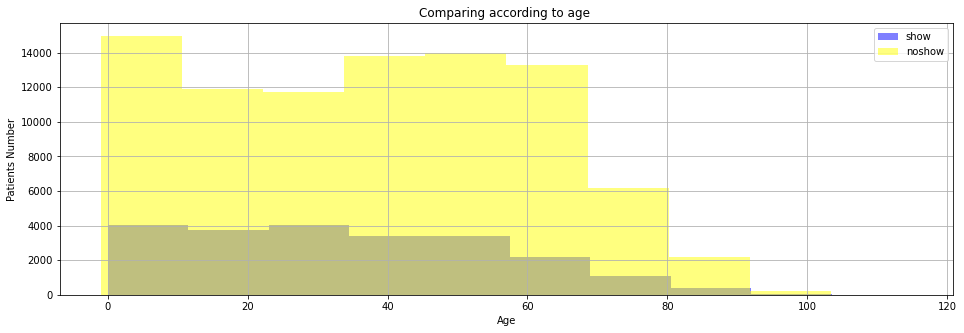

In [35]:
def showing(df,col_name,attended,absent):# setting
    
    plt.figure(figsize=[16,5])
    df[col_name][show].hist(alpha=0.5,bins=10,color='blue',label='show')
    df[col_name][noshow].hist(alpha=0.5,bins=10,color='yellow',label='noshow')
    plt.legend();
    plt.title('Comparing according to age ')
    plt.xlabel('Age')
    plt.ylabel('Patients Number')
showing(df,'Age',show,noshow)

In [ ]:
### Research Question 3 (Does the Chronic deseases affect the showing or no_showing rate?)

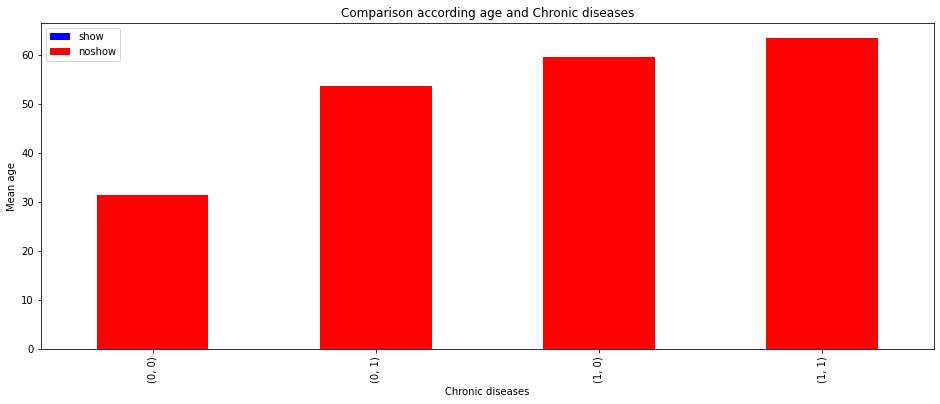

In [36]:
plt.figure(figsize=[16,6])# setting the figure size 
df[show].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind='bar',color='blue',label='show')
df[noshow].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('Comparison according age and Chronic diseases')
plt.xlabel('Chronic diseases')
plt.ylabel('Mean age');

In [ ]:
df[show].groupby(['Hypertension', 'Diabetes']).mean()['Age'],df[noshow].groupby(['Hypertension', 'Diabetes']).mean()['Age']

In [ ]:
### Research Question 4 (Which sex attened more?)

In [ ]:
def showing(df,col_name,attended,absent):# setting
    
    plt.figure(figsize=[16,5])
    df[col_name][show].hist(alpha=0.5,bins=10,color='blue',label='show')
    df[col_name][noshow].hist(alpha=0.5,bins=10,color='yellow',label='noshow')
    plt.legend();
    plt.title('Comparing according to gender ')
    plt.xlabel('Gender')
    plt.ylabel('Patients Number')
showing(df,'Gender',show,noshow)

In [ ]:
#here we are going to try a new graph to represent the previous data
def showing(df,col_name,attended,absent):# setting
    
    plt.figure(figsize=[16,5])
    df[col_name][show].value_counts(normalize=True).plot(kind='pie',label='show')
   # df[col_name][noshow].hist(alpha=0.5,bins=10,color='yellow',label='noshow')
    plt.legend();
    plt.title('Comparing according to gender ')
    plt.xlabel('Gender')
    plt.ylabel('Patients Number')
showing(df,'Gender',show,noshow)

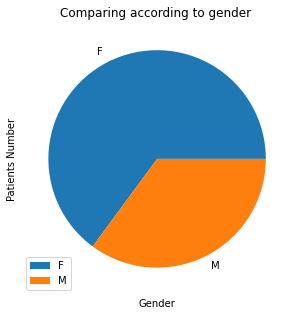

In [37]:
#here we are going to try a new graph to represent the previous data
def showing(df,col_name,attended,absent):# setting
    
    plt.figure(figsize=[16,5])
    df[col_name][noshow].value_counts(normalize=True).plot(kind='pie',label='show')
   # df[col_name][noshow].hist(alpha=0.5,bins=10,color='yellow',label='noshow')
    plt.legend();
    plt.title('Comparing according to gender ')
    plt.xlabel('Gender')
    plt.ylabel('Patients Number')
showing(df,'Gender',show,noshow)

In [ ]:
### Research Question 5 (Does age and chronic diseases affect the rate together?)

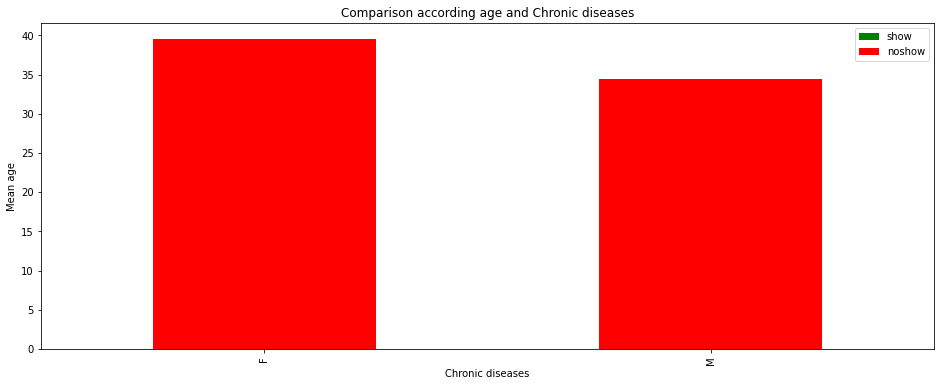

In [38]:
plt.figure(figsize=[16,6])# setting the figure size 
df[show].groupby('Gender').Age.mean().plot(kind='bar',color='green',label='show')
df[noshow].groupby('Gender').Age.mean().plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('Comparison according age and Chronic diseases')
plt.xlabel('Chronic diseases')
plt.ylabel('Mean age');

In [39]:
print(df[show].groupby('Gender').Age.mean()),df[noshow].groupby('Gender').Age.mean(),
df[show].groupby('Gender').Age.median(),df[noshow].groupby('Gender').Age.median()

Gender
F    36.16219
M    30.83301
Name: Age, dtype: float64


(Gender
 F    34
 M    28
 Name: Age, dtype: int64,
 Gender
 F    40
 M    34
 Name: Age, dtype: int64)

In [ ]:
### Research Question 6 (Does SMS affect the ratio?)

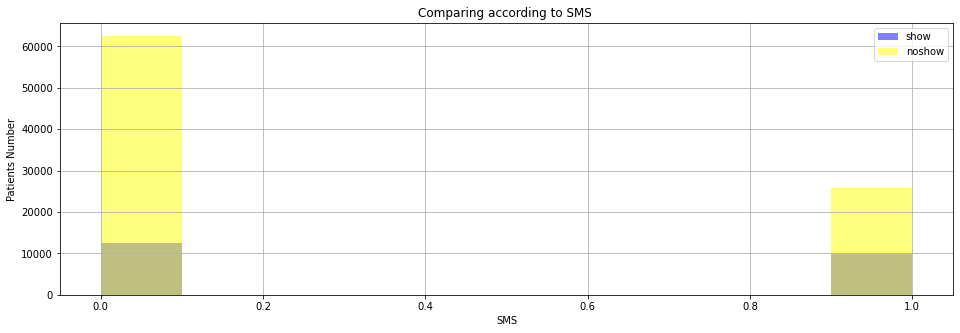

In [40]:
def showing(df,col_name,attended,absent):# setting
    
    plt.figure(figsize=[16,5])
    df[col_name][show].hist(alpha=0.5,bins=10,color='blue',label='show')
    df[col_name][noshow].hist(alpha=0.5,bins=10,color='yellow',label='noshow')
    plt.legend();
    plt.title('Comparing according to SMS ')
    plt.xlabel('SMS')
    plt.ylabel('Patients Number')
showing(df,'SMS_received',show,noshow)

In [8]:
plt.figure(figsize=[14,8])# setting the figure size 
df.Neighbourhood[show].value_counts().plot(kind='bar',color='green',label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar',color='red',label='noshow')
plt.legend()
plt.title('Comparison according to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

NameError: name 'df' is not defined

<Figure size 1008x576 with 0 Axes>

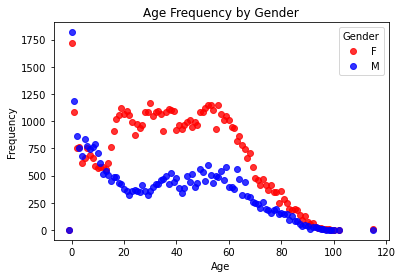

In [14]:
pd.crosstab(df.Age, df.Gender).plot(style=['or','ob'], alpha=0.8);
plt.title('Age Frequency by Gender')
plt.ylabel('Frequency');

***
Looking at the Age histogram with a higher number of bins (more granularity), we can see there are basically three age groups with higher frequency than the others: there is a peak for very young patients; another one at around 30-35 years; and the last one around 45-55 years.


<a id='conclusions'></a>
## Conclusions

> **Summary**: We found out that the ratio between the noshow to the show is nearly 3:1, Females attend more than males to thier appointments, Also SMS should be more effective and they should develope thier service, Then mean of age is 34 years old,'Jardin Camburi' has the higest no_show rate of all neighbourhoods.  

> **Limitations**: I think there is no clear correlation between showing and gender or chronic diseases.